# Exploratory Data Analysis (EDA) for Classification (discrete outcome variable)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'DATA/OSA_DB_cleaned.xlsx'
df = pd.read_excel(file_path)

# Drop the 'Patient' column
df = df.drop(columns=['Patient'])

df.head()

,Gender,AHI,Weight,Age,Height,Cervical,BMI
0,1,71.0,82.000000,39.0,168.000000,40.617735,29.053288
1,1,29.6,119.000000,56.0,174.000000,48.000000,39.305060
2,1,56.0,87.797037,46.0,171.399408,43.000000,29.885548
3,1,19.7,78.000000,39.0,168.000000,42.000000,27.636054
4,1,9.0,80.000000,32.0,173.000000,40.000000,26.729927


### Categorize outcome variable (AHI) in 4 distinct classes 

Number of patients with no OSA (AHI <= 5): 137
Number of patients with mild OSA (5 < AHI <= 15): 202
Number of patients with moderate OSA (15 < AHI <= 30): 153
Number of patients with severe OSA (AHI > 30): 157


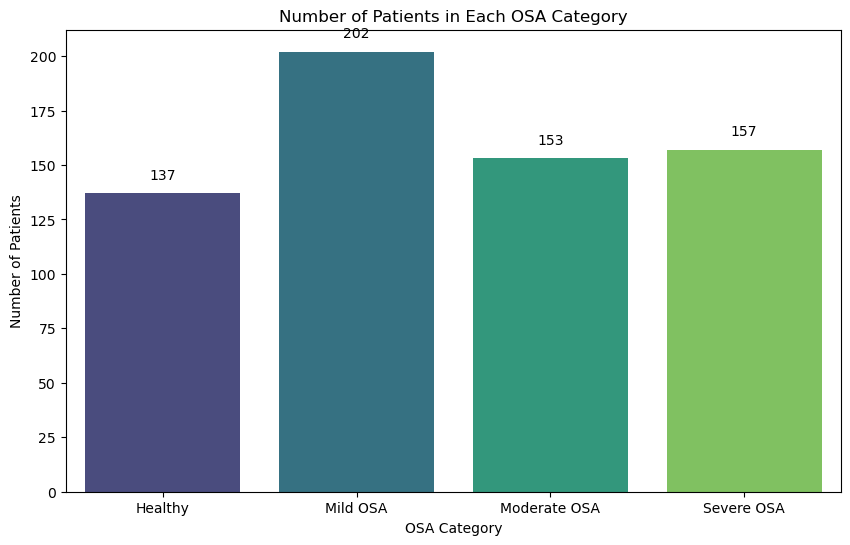

In [2]:
# Define the conditions for each OSA category
severe_osa = df[df['AHI'] > 30]
moderate_osa = df[(df['AHI'] > 15) & (df['AHI'] <= 30)]
mild_osa = df[(df['AHI'] > 5) & (df['AHI'] <= 15)]
no_osa = df[df['AHI'] <= 5]

# Calculate the number of patients in each category
num_severe_osa = severe_osa.shape[0]
num_moderate_osa = moderate_osa.shape[0]
num_mild_osa = mild_osa.shape[0]
num_no_osa = no_osa.shape[0]
# Print the results
print(f"Number of patients with no OSA (AHI <= 5): {num_no_osa}")
print(f"Number of patients with mild OSA (5 < AHI <= 15): {num_mild_osa}")
print(f"Number of patients with moderate OSA (15 < AHI <= 30): {num_moderate_osa}")
print(f"Number of patients with severe OSA (AHI > 30): {num_severe_osa}")

# Plot the number of patients in each OSA category
categories = ['Healthy', 'Mild OSA', 'Moderate OSA', 'Severe OSA']
counts = [num_no_osa, num_mild_osa, num_moderate_osa, num_severe_osa]

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts, palette='viridis')
plt.title('Number of Patients in Each OSA Category')
plt.xlabel('OSA Category')
plt.ylabel('Number of Patients')

# Annotate the bars with the absolute values
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()


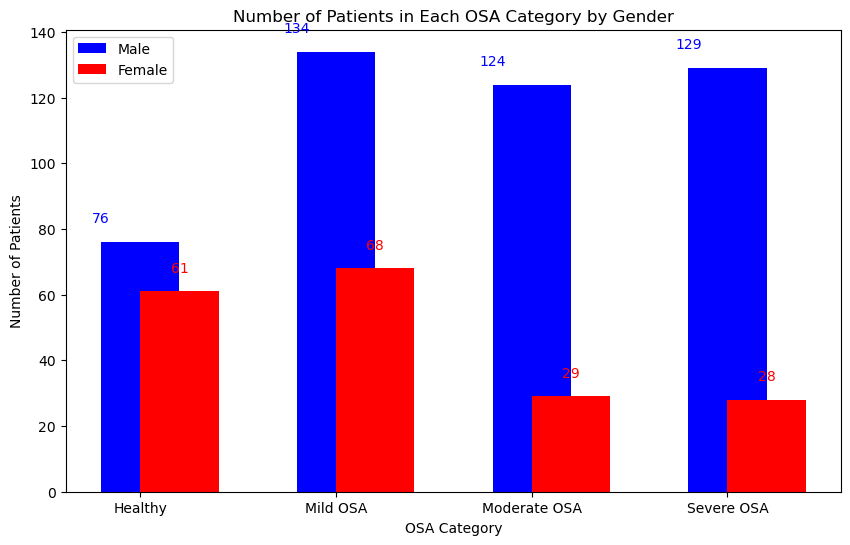

In [3]:
# Plot the number of patients in each OSA category by gender
categories = ['Healthy', 'Mild OSA', 'Moderate OSA', 'Severe OSA']
counts_male = [no_osa[no_osa['Gender'] == 1].shape[0], mild_osa[mild_osa['Gender'] == 1].shape[0], moderate_osa[moderate_osa['Gender'] == 1].shape[0], severe_osa[severe_osa['Gender'] == 1].shape[0]]
counts_female = [no_osa[no_osa['Gender'] == 0].shape[0], mild_osa[mild_osa['Gender'] == 0].shape[0], moderate_osa[moderate_osa['Gender'] == 0].shape[0], severe_osa[severe_osa['Gender'] == 0].shape[0]]

x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, counts_male, width=0.4, label='Male', align='center', color='blue')
plt.bar(x, counts_female, width=0.4, label='Female', align='edge', color='red')
plt.title('Number of Patients in Each OSA Category by Gender')
plt.xlabel('OSA Category')
plt.ylabel('Number of Patients')
plt.xticks(x, categories)
plt.legend()

# Annotate the bars with the absolute values
for i, (count_male, count_female) in enumerate(zip(counts_male, counts_female)):
    plt.text(i - 0.2, count_male + 5, str(count_male), ha='center', va='bottom', color='blue')
    plt.text(i + 0.2, count_female + 5, str(count_female), ha='center', va='bottom', color='red')

plt.show()

### Categorize outcome variable (AHI) in 2 distinct classes 

In [13]:
# Add the OSA column with the specified categories
df['OSA'] = df['AHI'].apply(lambda x: 'Healthy' if x <= 5 else ('Severe' if x > 30 else None))

# Remove rows with AHI values larger than 5 and less or equal to 30
df_class = df.dropna(subset=['OSA'])

df_class.head()

# output_file_path = 'DATA/OSA_DB_class.xlsx'
# df_class.to_excel(output_file_path, index=False)

,Gender,AHI,Weight,Age,Height,Cervical,BMI,OSA
0,1,71.0,82.000000,39.0,168.000000,40.617735,29.053288,Severe
2,1,56.0,87.797037,46.0,171.399408,43.000000,29.885548,Severe
5,1,2.0,109.000000,32.0,190.000000,42.000000,30.193906,Healthy
6,1,34.0,86.000000,39.0,169.000000,42.000000,30.110991,Severe
7,1,60.0,145.000000,47.0,172.000000,44.000000,49.012980,Severe


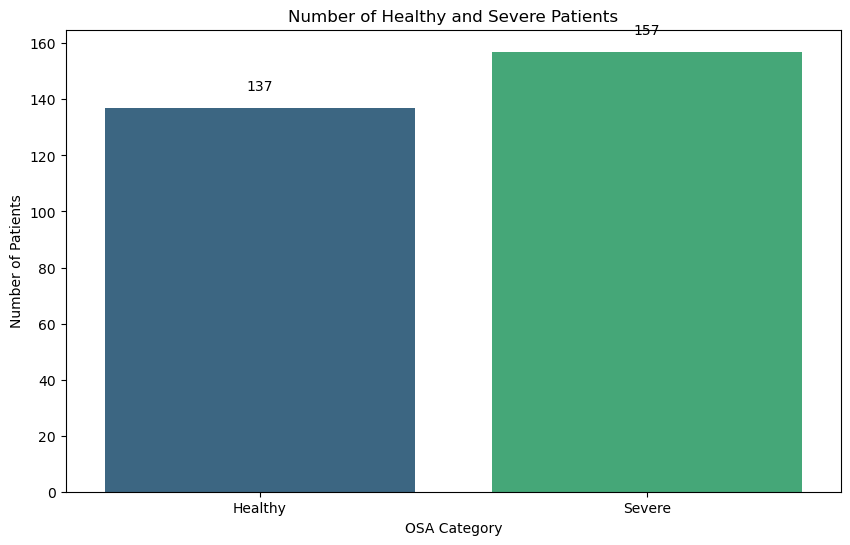

In [14]:
# Separate the counts for healthy and severe cases
osa_counts = df_class['OSA'].value_counts()
healthy_counts = osa_counts['Healthy']
severe_counts = osa_counts['Severe']

# Plot the number of healthy and severe patients
plt.figure(figsize=(10, 6))
sns.barplot(x=['Healthy', 'Severe'], y=[healthy_counts, severe_counts], palette='viridis')
plt.title('Number of Healthy and Severe Patients')
plt.xlabel('OSA Category')
plt.ylabel('Number of Patients')

# Annotate the bars with the absolute values
plt.text(0, healthy_counts + 5, str(healthy_counts), ha='center', va='bottom')
plt.text(1, severe_counts + 5, str(severe_counts), ha='center', va='bottom')

plt.show()


In [15]:
df_class.groupby('OSA').describe()

Gender                                                 AHI             \
         count      mean       std  min  25%  50%  75%  max  count       mean   
OSA                                                                             
Healthy  137.0  0.554745  0.498818  0.0  0.0  1.0  1.0  1.0  137.0   2.327737   
Severe   157.0  0.821656  0.384027  0.0  1.0  1.0  1.0  1.0  157.0  47.363439   

         ... Cervical          BMI                                             \
         ...      75%   max  count       mean       std        min        25%   
OSA      ...                                                                    
Healthy  ...     41.0  50.0  137.0  27.997904  4.669318  18.590125  24.508946   
Severe   ...     45.0  53.0  157.0  32.512437  6.063631  21.357796  28.075043   

                                          
               50%        75%        max  
OSA                                       
Healthy  26.881720  30.486685  43.282548  
Severe   31.309074  35.918367  52.298554  

[2 rows x 56 columns]

OSA
Healthy    AxesSubplot(0.125,0.11;0.775x0.77)
Severe     AxesSubplot(0.125,0.11;0.775x0.77)
Name: Cervical, dtype: object

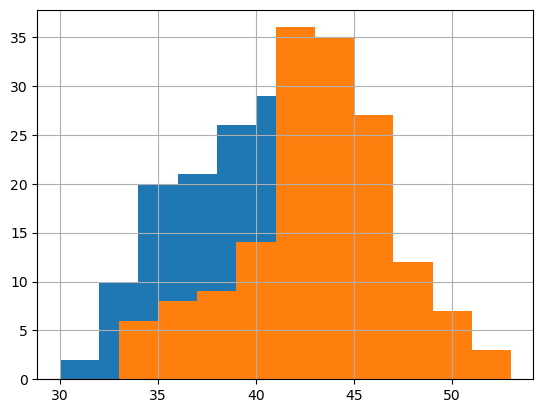

In [16]:
df_class.groupby('OSA')['Cervical'].hist()